<a href="https://colab.research.google.com/github/ch-aitali/assignments/blob/main/Random_forest_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("/content/Fraud_check (2).csv")

In [4]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
data1 = pd.get_dummies(data, columns = ['Undergrad','Marital.Status','Urban'])

In [9]:
data1['Taxable.Income']=pd.cut(data1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [10]:
X = data1.iloc[:,1:10]
y = data1.iloc[:,0]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


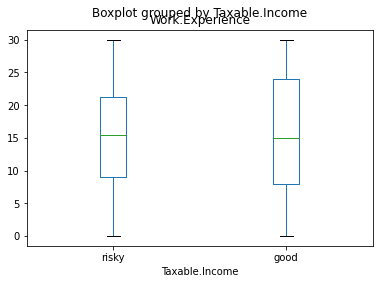

In [13]:
data1.boxplot(by ='Taxable.Income', column =['Work.Experience'], grid = False)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


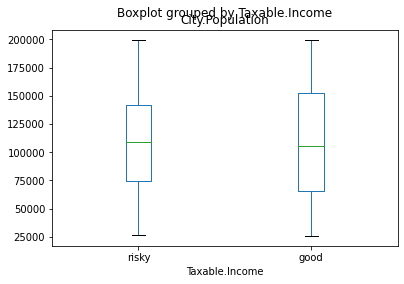

In [16]:
data1.boxplot(by ='Taxable.Income', column =['City.Population'], grid = False)

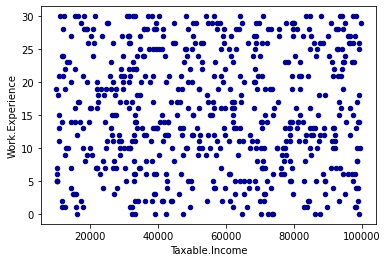

In [18]:
data.plot.scatter(x='Taxable.Income',
                       y='Work.Experience',
                      c='DarkBlue')

In [11]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [12]:
y_train.value_counts()

good     382
risky     98
Name: Taxable.Income, dtype: int64

In [ ]:
model =RF(n_jobs=5,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.7416666666666667

In [ ]:
pred_train = model.predict(x_train)

In [ ]:
confusion_matrix(y_train,pred_train)

array([[381,   0],
       [  0,  99]])

In [ ]:
pred_test = model.predict(x_test)

In [ ]:
confusion_matrix(y_test,pred_test)

array([[85, 10],
       [24,  1]])

In [ ]:
accuracy_score(y_test,pred_test)

0.7166666666666667

In [ ]:
data2=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [ ]:
data2

,Actual,Predicted
8,good,good
156,good,risky
553,good,good
17,good,good
345,good,good
...,...,...
406,good,good
576,good,good
550,good,risky
247,risky,good
